In [1]:
from spot2intensity import Point, Rectangle, Grid, plot_patches,create_patches,create_circle_patches\
,rectangle_reshape,find_circle_coordinates
from data import COLLECTIONS
from utils import ensure_dir
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
import copy
import numpy as np
from pprint import pprint


In [2]:
pprint(COLLECTIONS)

{'180124_E14_X31': <spot2intensity.Collection object at 0x7ff1d3b30c90>,
 '180124_E15_X31': <spot2intensity.Collection object at 0x7ff1d3acd690>,
 '180124_N21_Pan': <spot2intensity.Collection object at 0x7ff1d3b46390>,
 '180124_N22_Cal': <spot2intensity.Collection object at 0x7ff1d3b469d0>,
 '180124_N23_X31': <spot2intensity.Collection object at 0x7ff1d3acd050>}


In [14]:
this_collection = COLLECTIONS['180124_N22_Cal']
spots = this_collection.pd_complete_spots()

Claculating grid starting at:(310,314)
Claculating grid starting at:(321,2873)
Claculating grid starting at:(311,5254)


In [15]:
directory = "data/{}/{}/".format(this_collection.study,this_collection.name)
ensure_dir(directory)
#save data
inte = spots.pivot(index="Row", columns="Column", values="intensities")
inte.to_csv("{}intensity.tsv".format(directory), sep='\t')
int2 = spots.pivot(index="Row", columns="Column", values="intensities2")
int2.to_csv("{}intensity2.tsv".format(directory), sep='\t')
circ_q = spots.pivot(index="Row", columns="Column", values="circle_qual")
circ_q.to_csv("{}circle_quality.tsv".format(directory), sep='\t')
std2 = spots.pivot(index="Row", columns="Column", values="std_intensities2")
std2.to_csv("{}intensity2_std.tsv".format(directory), sep='\t')

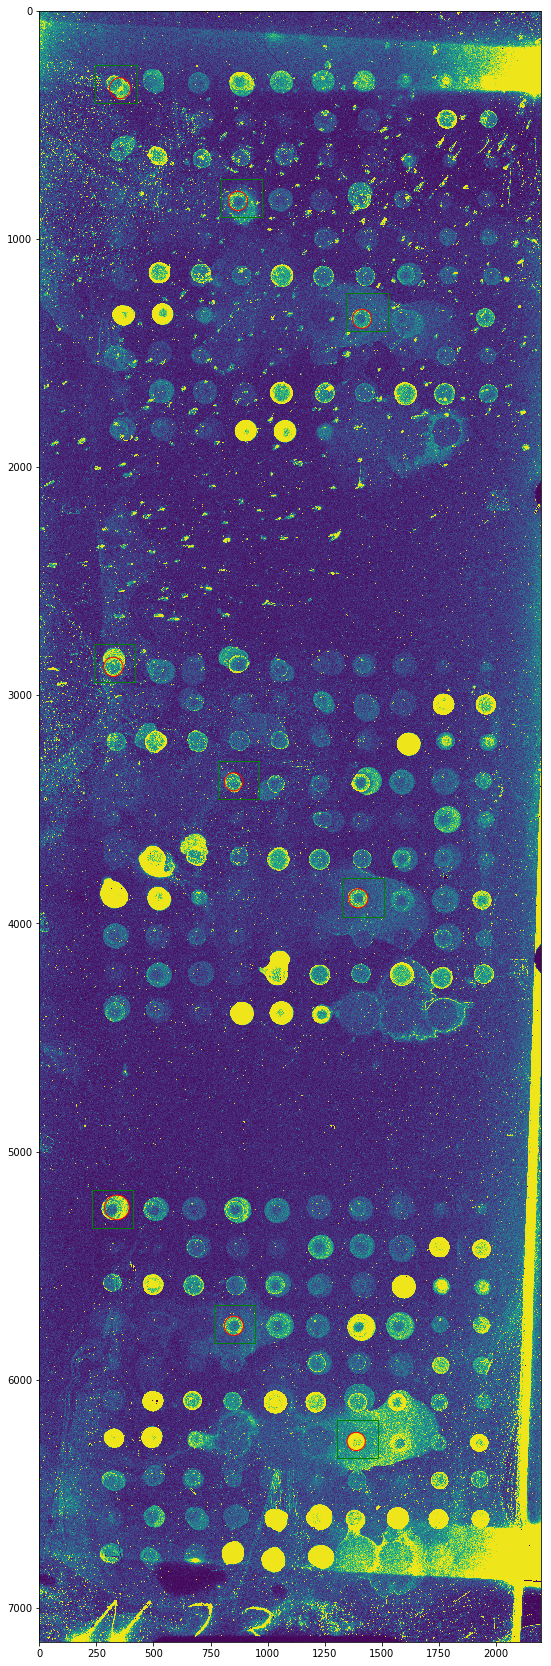

In [5]:
fig,ax = plt.subplots(1, figsize=(30,30))

th = this_collection.image
th[th>150]=0
ax.imshow(th)
spots_test = spots[spots["Name"] == "Pep 10_1.0"]
#spots_test = spots
for i,spot in spots_test.iterrows():
    circ = create_circle_patches(spot["circles"].center,spot["circles"].radius)
    rec = patches.Rectangle((spot["squares"].get_xy()),
                            spot["squares"].get_width(),
                            spot["squares"].get_height(),
                            fill=False,  # remove background
                            linewidth=1,
                            edgecolor='g',
                            )
    ax.add_patch(circ)
    ax.add_patch(rec)
plt.savefig("{}image_detected".format(directory))
plt.show()
